In [5]:
import pandas as pd
import os
import glob

df = pd.read_csv('/content/inputforlstm.csv')

df

,date,fpi cash,fpi index futures values,fpistock futures value,dii stock future,dii index future,OI PCR
0,17-Apr-2023,-90.229469,-90.229469,-80.050725,-73.229248,78.917938,0.920781
1,13-Apr-2023,150.928744,150.927536,-2.084541,71.292444,-185.665533,1.122671
2,12-Apr-2023,202.131643,202.130435,178.193237,72.126373,-78.979246,1.180173
3,11-Apr-2023,264.910628,264.909420,133.286232,0.240146,-3.504826,1.112264
4,10-Apr-2023,223.320048,223.318841,94.102657,24.439737,-18.096904,0.854249
...,...,...,...,...,...,...,...
95,25-Nov-2022,NaN,-200.178744,NaN,NaN,32.289270,0.975251
96,24-Nov-2022,NaN,389.658213,NaN,NaN,21.252067,1.226573
97,23-Nov-2022,NaN,34.158213,NaN,NaN,-4.854698,0.921469
98,22-Nov-2022,NaN,183.737923,NaN,NaN,7.175329,0.894504


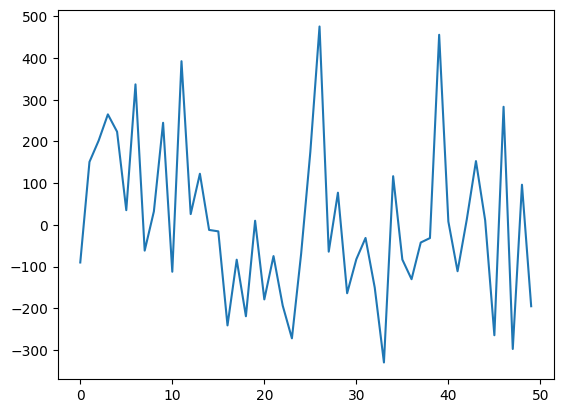

In [6]:
import matplotlib.pyplot as plt
# for i in range(0,5):
plt.plot(df.index, df['fpi cash'])

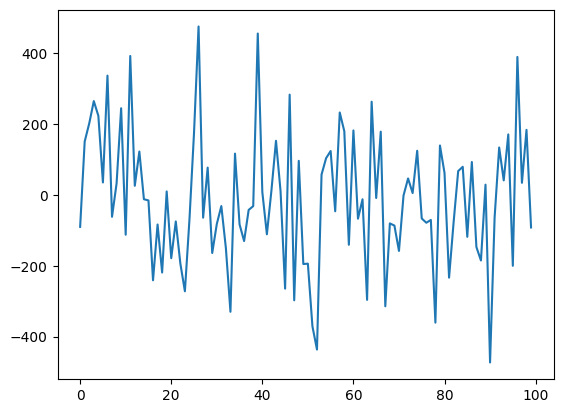

In [7]:

plt.plot(df.index, df['fpi index futures values'])

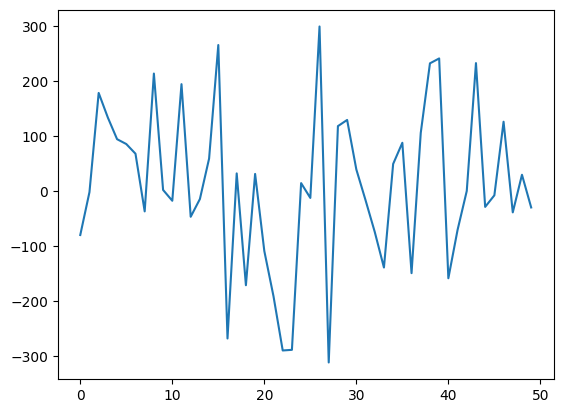

In [8]:

plt.plot(df.index, df['fpistock futures value'])

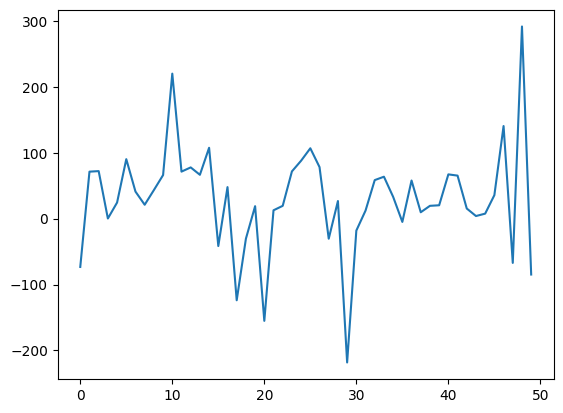

In [9]:

plt.plot(df.index, df['dii stock future'])

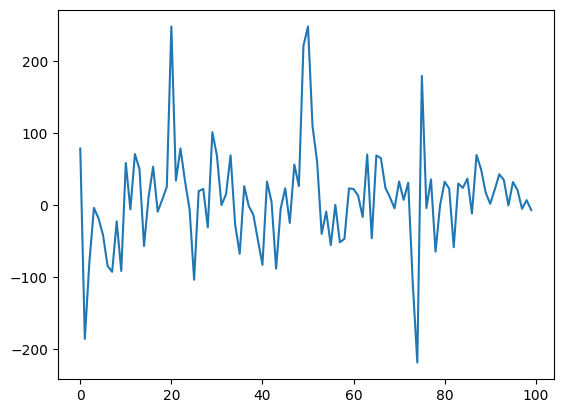

In [10]:

plt.plot(df.index, df['dii index future'])

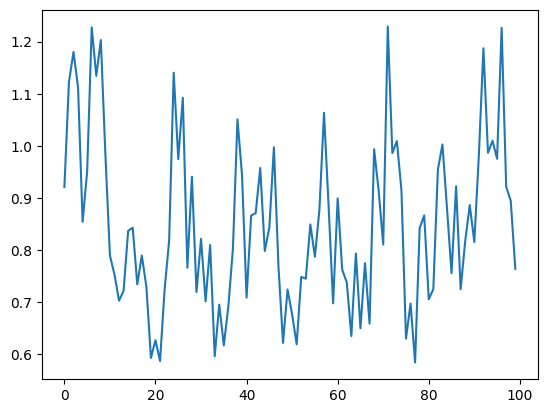

In [11]:

plt.plot(df.index, df['OI PCR'])

In [12]:
df_oipcr = df['OI PCR']
np_oipcr = df_oipcr.to_numpy()
np_oipcr.shape

(100,)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
X = []
y = []
x_ax = []
i = 0
while(i < len(np_oipcr)-1):
  temp_x = []
  # print(i)
  x_ax.append(i/5)
  temp_x.append(np_oipcr[i])
  temp_x.append(np_oipcr[i+1])
  temp_x.append(np_oipcr[i+2])
  temp_x.append(np_oipcr[i+3])
  X.append(temp_x)
  y.append(np_oipcr[i+4])
  i = i + 5

print('X_data')
X = np.array(X)
print(X.shape)
print('y_data')
y = np.array(y)
print(y.shape)

print(x_ax)


X_data
(20, 4)
y_data
(20,)
[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0]


[[0.70561744 0.72511869 0.95421362 1.00269171]
 [0.75576632 0.92239966 0.72496031 0.81711526]
 [0.81544955 0.9823759  1.18736079 0.98666048]
 [0.97525107 1.22657261 0.92146895 0.89450441]] [0.88074097 0.88630725 1.00984964 0.76407389]


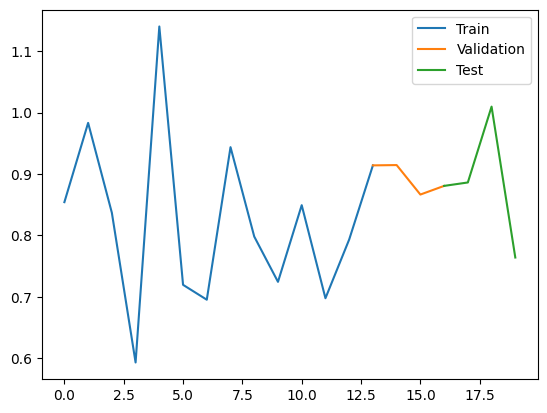

In [14]:
x_ax_train, X_train, y_train = x_ax[:14], X[:14], y[:14]

x_ax_val, X_val, y_val = x_ax[13:17], X[13:17], y[13:17]
x_ax_test, X_test, y_test = x_ax[16:], X[16:], y[16:]
print(X_test,y_test)
plt.plot(x_ax_train, y_train)
plt.plot(x_ax_val, y_val)
plt.plot(x_ax_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((4, 1)),
                    layers.LSTM(128),
                    layers.Dense(64, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.7090 - mean_absolute_error: 0.8310 - val_loss: 0.7239 - val_mean_absolute_error: 0.8506
Epoch 2/100
1/1 [==============================] - 0s 32ms/step - loss: 0.6291 - mean_absolute_error: 0.7816 - val_loss: 0.6640 - val_mean_absolute_error: 0.8147
Epoch 3/100
1/1 [==============================] - 0s 36ms/step - loss: 0.5743 - mean_absolute_error: 0.7457 - val_loss: 0.6090 - val_mean_absolute_error: 0.7802
Epoch 4/100
1/1 [==============================] - 0s 43ms/step - loss: 0.5242 - mean_absolute_error: 0.7112 - val_loss: 0.5549 - val_mean_absolute_error: 0.7447
Epoch 5/100
1/1 [==============================] - 0s 32ms/step - loss: 0.4748 - mean_absolute_error: 0.6755 - val_loss: 0.4958 - val_mean_absolute_error: 0.7039
Epoch 6/100
1/1 [==============================] - 0s 31ms/step - loss: 0.4213 - mean_absolute_error: 0.6346 - val_loss: 0.4349 - val_mean_absolute_error: 0.6592
Epoch 7/100
1/1 [=============

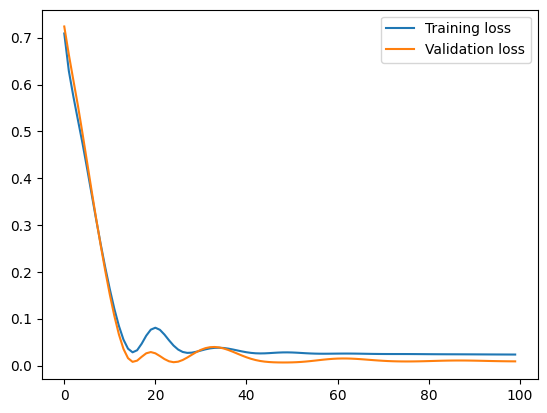

In [16]:
# import matplotlib.pyplot as plt
tr_loss = history.history['loss']
vr_loss = history.history['val_loss']
# mar_loss = history.history['mean_absolute_error']
# tr_loss
plt.plot(tr_loss)
plt.plot(vr_loss)
plt.legend(['Training loss', 'Validation loss'])

1/1 [==============================] - 0s 327ms/step


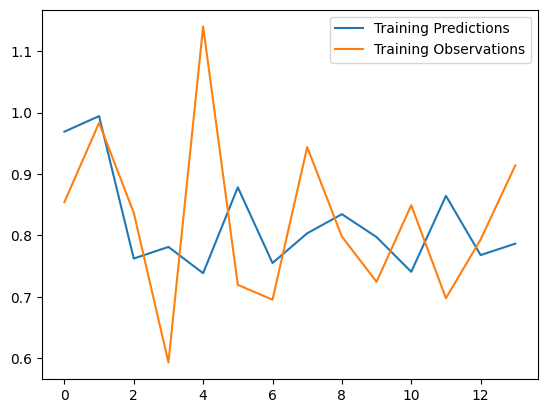

In [17]:
train_predictions = model.predict(X_train).flatten()

plt.plot(x_ax_train, train_predictions)
plt.plot(x_ax_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

1/1 [==============================] - 0s 16ms/step


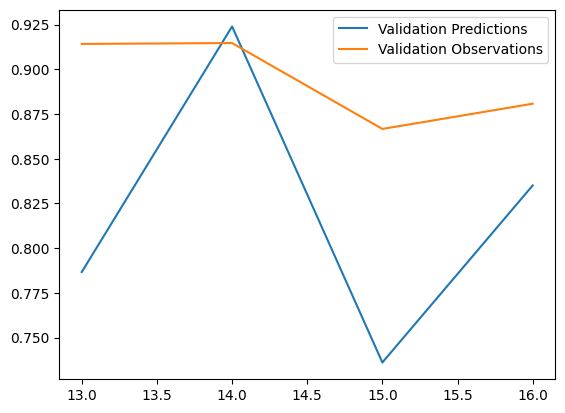

In [18]:
val_predictions = model.predict(X_val).flatten()

plt.plot(x_ax_val, val_predictions)
plt.plot(x_ax_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

(4, 4)
1/1 [==============================] - 0s 17ms/step


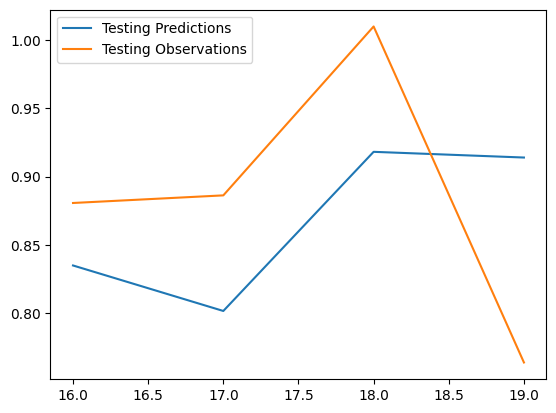

In [19]:
print(X_test.shape)
test_predictions = model.predict(X_test).flatten()

plt.plot(x_ax_test, test_predictions)
plt.plot(x_ax_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

Testing OI PCR of 16 april

In [28]:
arr = [1.2291186913096859,0.9862423212573875,0.7529735544579227,0.729617630007262]
today_test = np.array(arr)
today_test = today_test.reshape((1,4))
print(today_test)
print(today_test.shape)
today_test_predictions = model.predict(today_test)
print('16 apr OIPCR prediction : ', today_test_predictions)
print('actual OIPCR is : 0.92')

[[1.22911869 0.98624232 0.75297355 0.72961763]]
(1, 4)
1/1 [==============================] - 0s 16ms/step
16 apr OIPCR prediction :  [[0.85673004]]
actual OIPCR is : 0.92
